In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [4]:
# Abrir archivo
data = pd.read_csv('12_Serie_tiempo.csv', sep=';', decimal=',')
data = data.drop("fest", axis=1)
data.rename( columns={'Unnamed: 0':'ID'}, inplace=True )
# Elimina los valores muy bajos segun el rango inter cuartil
nan= np.nan
for column in data:
  if(data.dtypes[column] == float):
    Q1=np.percentile(data[column],25)
    Q3=np.percentile(data[column],75)
    r_inter_q = Q3-Q1
    umbralsup= Q3 + 1.5*r_inter_q
    umbralinf= Q1 - 1.5*r_inter_q
    for i in data[column]:
      if(i<=umbralinf):
        data[column] = data[column].replace([i], nan)
#    else if(i>=umbralsup):
#        data[column] = data[column].replace([i], nan)

#Establece valores eliminados por el promedio de sus vecinos
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df1 = data.drop(columns=["ID", "Fecha", "Horas", "Agno", "Mes", "Dia_mes", "Dia_sem"])
data[df1.keys()]= imputer.fit_transform(df1)
data_modelo = pd.DataFrame(data, columns = ["Fecha", "Agno", "Mes","Horas","Dia_sem", "Dia_mes"])
data_modelo["Fecha"]=data_modelo["Fecha"].apply(lambda x:datetime.datetime.strptime(x, '%d-%m-%Y'))
data_modelo["Dia_ango"]=data_modelo["Fecha"].apply(lambda x: x.dayofyear)
data_modelo= data_modelo.drop(columns="Fecha")
data_modelo[df1.keys()]= data[df1.keys()]

Text(0, 0.5, 'Velocidad (km/h)')

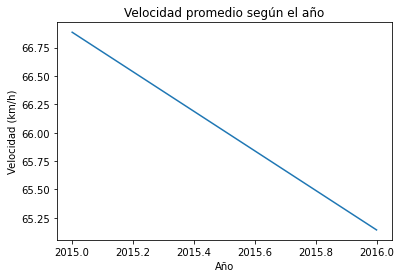

In [5]:
data.drop(columns=["ID", "Fecha", "Dia_sem", "Mes", "Dia_mes", "Horas"]).groupby("Agno").mean().mean(axis=1).plot(title="Velocidad promedio según el año")
plt.xlabel("Año")
plt.ylabel("Velocidad (km/h)")

Text(0, 0.5, 'Velocidad (km/h)')

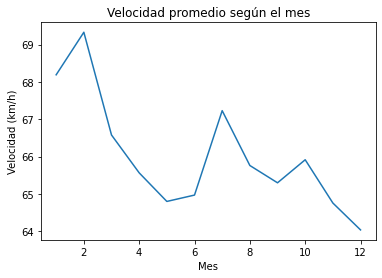

In [6]:
data.drop(columns=["ID", "Fecha", "Dia_sem", "Agno", "Dia_mes", "Horas"]).groupby("Mes").mean().mean(axis=1).plot(title="Velocidad promedio según el mes")
plt.xlabel("Mes")
plt.ylabel("Velocidad (km/h)")

Text(0, 0.5, 'Velocidad (km/h)')

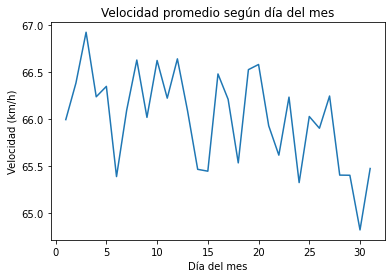

In [7]:
data.drop(columns=["ID", "Fecha", "Dia_sem", "Agno", "Mes", "Horas"]).groupby("Dia_mes").mean().mean(axis=1).plot(title="Velocidad promedio según día del mes")
plt.xlabel("Día del mes")
plt.ylabel("Velocidad (km/h)")

Text(0, 0.5, 'Velocidad (km/h)')

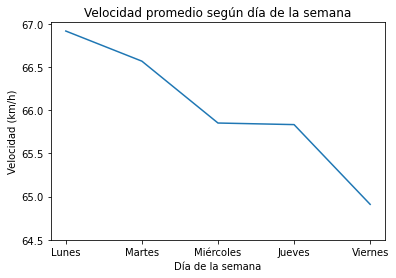

In [8]:
data.drop(columns=["ID", "Fecha", "Horas", "Agno", "Mes", "Dia_mes"]).groupby("Dia_sem").mean().mean(axis=1).plot(title="Velocidad promedio según día de la semana",
                                                                                                                  yticks=[64.5,65,65.5,66,66.5,67])
plt.xticks(ticks=[1,2,3,4,5], labels=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes"])                                                                                                        
plt.xlabel("Día de la semana")
plt.ylabel("Velocidad (km/h)")

Text(0, 0.5, 'Velocidad (km/h)')

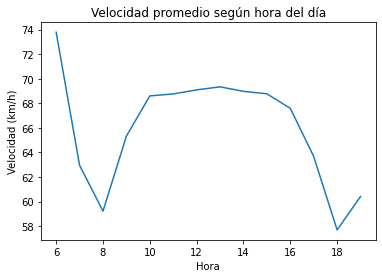

In [9]:
data.drop(columns=["ID", "Fecha", "Dia_sem", "Agno", "Mes", "Dia_mes"]).groupby("Horas").mean().mean(axis=1).plot(title="Velocidad promedio según hora del día")
plt.xlabel("Hora")
plt.ylabel("Velocidad (km/h)")